<a href="https://colab.research.google.com/github/ShahDharni/Taskk/blob/main/Copy_of_Pandas_Task(19_9_23).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**TAsk**

1) Analys data with matplots
	- Based on Male - Female
		+ Based on "race/ethnicity"
			+ Based on "parental level of education"
				+ Based on "lunch"
					- Re-present the data of "test preparation course", "math score", "reading score" and "writing score"

2) Create new Column name based on "Gender"
	- Find the Data creator Package

3) Create Total Score, Percentage, Grade Field based "math score", "reading score", and "writing score"

4) Then Again Show results Like same as point 1 (Analys data with matplots)

5) Convert Entire data into JSON (Dict)

6) Create new Django project Create model and Upload that Json


In [43]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [44]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [45]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

**1  Analys data with matplots - Based on Male - Female**

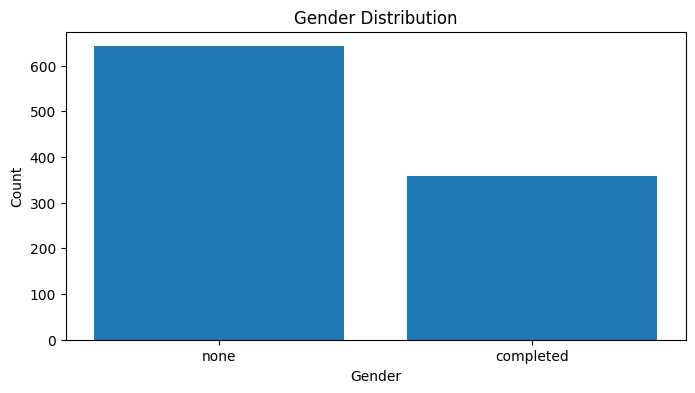

In [46]:
gender_counts = df["test preparation course"].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

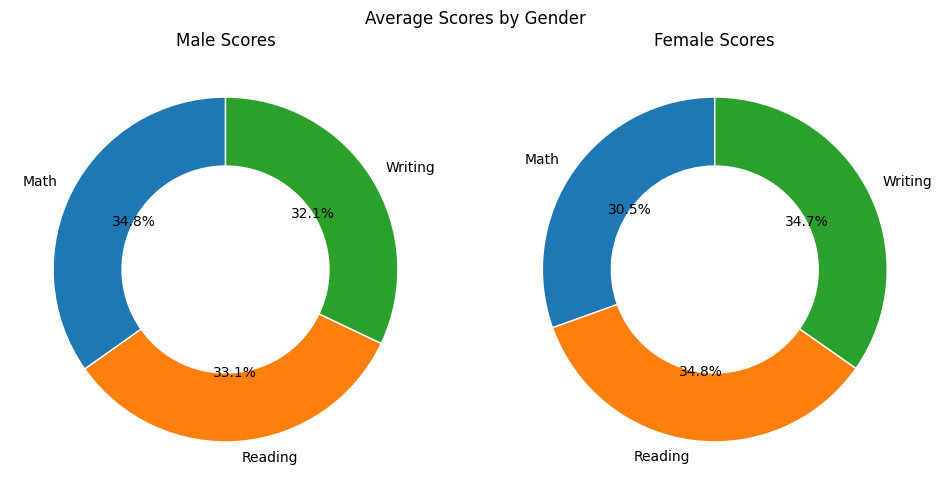

In [47]:

male_data = df[df['gender'] == 'male']
female_data = df[df['gender'] == 'female']

male_scores = male_data[['math score', 'reading score', 'writing score']].mean()
female_scores = female_data[['math score', 'reading score', 'writing score']].mean()

test_prep_labels = ['None', 'Completed']

test_prep_counts = [
    len(male_data[male_data['test preparation course'] == 'none']),
    len(male_data[male_data['test preparation course'] == 'completed']),
]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(male_scores, labels=['Math', 'Reading', 'Writing'], autopct='%1.1f%%', startangle=90,
           wedgeprops=dict(width=0.4, edgecolor='w'))
axs[0].set_title('Male Scores')

axs[1].pie(female_scores, labels=['Math', 'Reading', 'Writing'], autopct='%1.1f%%', startangle=90,
           wedgeprops=dict(width=0.4, edgecolor='w'))
axs[1].set_title('Female Scores')

plt.suptitle('Average Scores by Gender')

plt.tight_layout()
plt.show()



**Based on race/ethnicity**

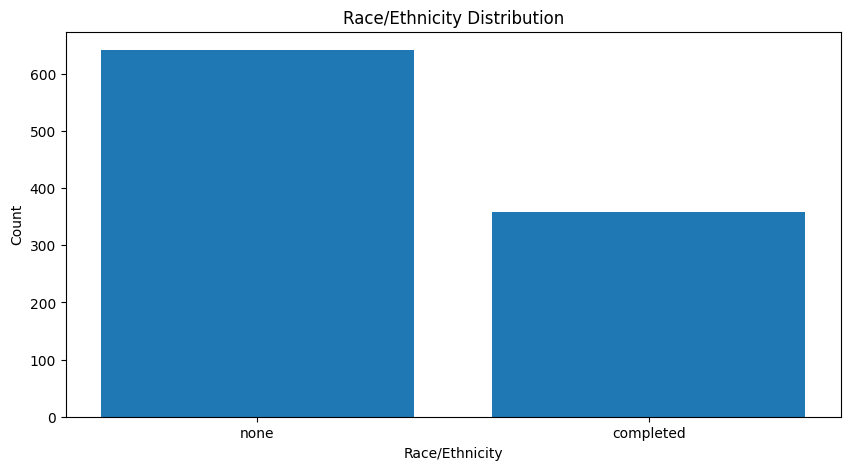

In [48]:

race_counts = df["test preparation course"].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(race_counts.index, race_counts.values)
plt.title("Race/Ethnicity Distribution")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Count")
plt.show()

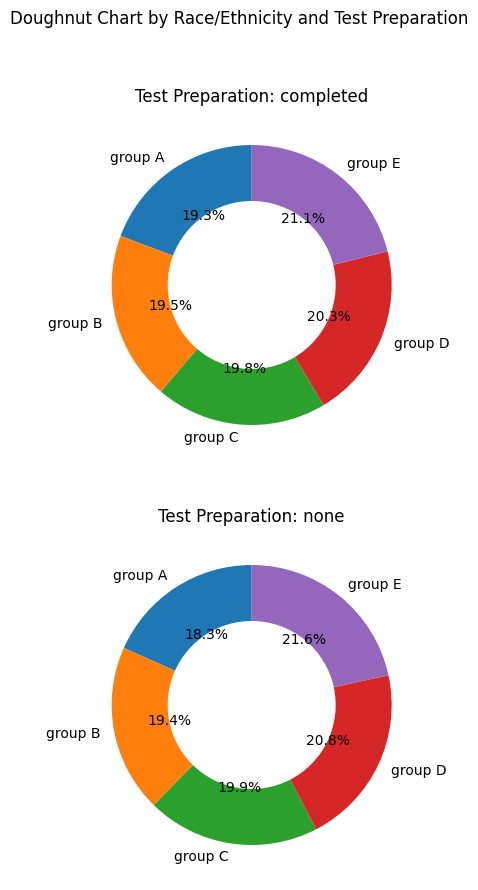

In [49]:



grouped_data = df.groupby(['race/ethnicity', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

labels = grouped_data['race/ethnicity'].unique()
test_prep_labels = grouped_data['test preparation course'].unique()

fig, ax = plt.subplots(len(test_prep_labels), 1, figsize=(10, 10))

for i, test_prep in enumerate(test_prep_labels):
    data = grouped_data[grouped_data['test preparation course'] == test_prep]
    math_scores = data['math score']
    reading_scores = data['reading score']
    writing_scores = data['writing score']

    total_scores = math_scores + reading_scores + writing_scores

    ax[i].pie(total_scores, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    ax[i].set_title(f'Test Preparation: {test_prep}')

fig.suptitle('Doughnut Chart by Race/Ethnicity and Test Preparation')

plt.show()




**Based on parental level of education**

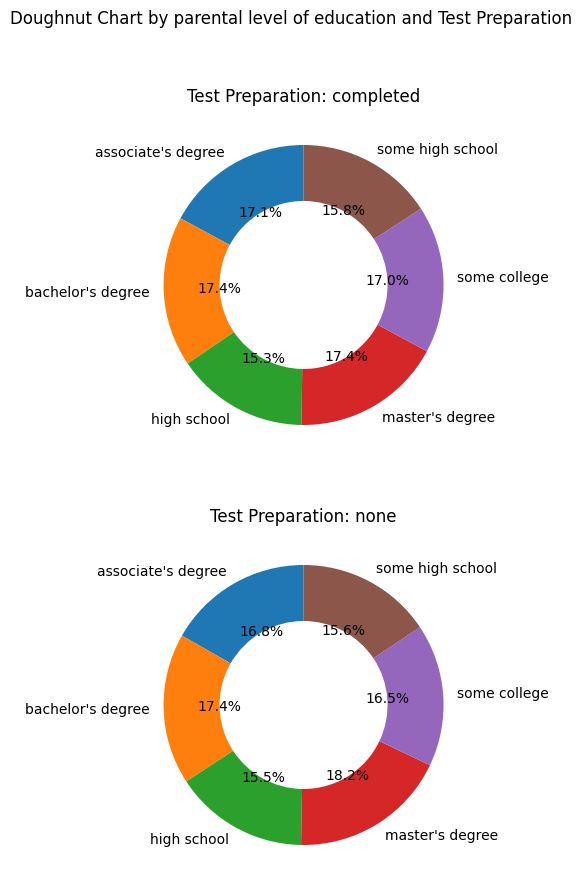

In [50]:


grouped_data = df.groupby(['parental level of education', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

labels = grouped_data['parental level of education'].unique()
test_prep_labels = grouped_data['test preparation course'].unique()

fig, ax = plt.subplots(len(test_prep_labels), 1, figsize=(10, 10))

for i, test_prep in enumerate(test_prep_labels):
    data = grouped_data[grouped_data['test preparation course'] == test_prep]
    math_scores = data['math score']
    reading_scores = data['reading score']
    writing_scores = data['writing score']


    total_scores = math_scores + reading_scores + writing_scores

    ax[i].pie(total_scores, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    ax[i].set_title(f'Test Preparation: {test_prep}')

fig.suptitle('Doughnut Chart by parental level of education and Test Preparation')

plt.show()




**Based on lunch**

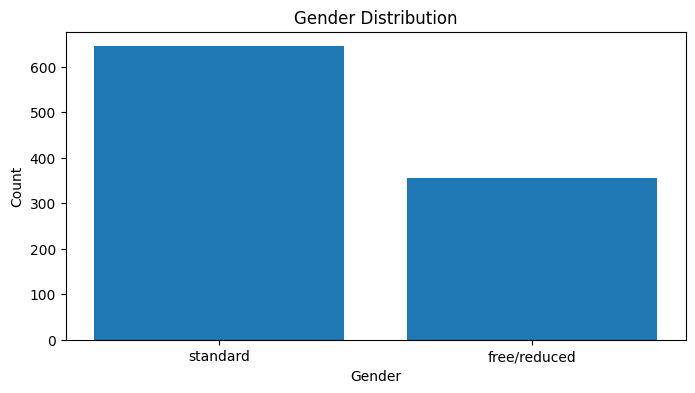

In [51]:
gender_counts = df["lunch"].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

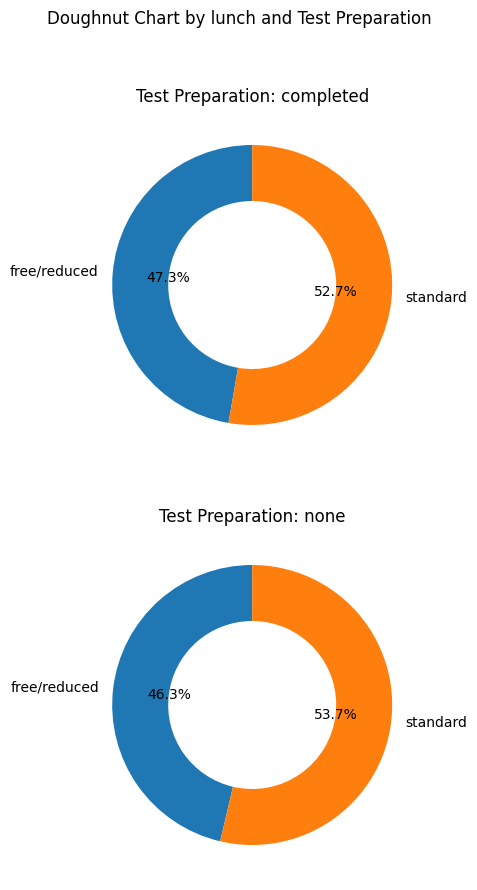

In [52]:

grouped_data = df.groupby(['lunch', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

labels = grouped_data['lunch'].unique()
test_prep_labels = grouped_data['test preparation course'].unique()

fig, ax = plt.subplots(len(test_prep_labels), 1, figsize=(10, 10))

for i, test_prep in enumerate(test_prep_labels):
    data = grouped_data[grouped_data['test preparation course'] == test_prep]
    math_scores = data['math score']
    reading_scores = data['reading score']
    writing_scores = data['writing score']

    total_scores = math_scores + reading_scores + writing_scores

    ax[i].pie(total_scores, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
    ax[i].set_title(f'Test Preparation: {test_prep}')

fig.suptitle('Doughnut Chart by lunch and Test Preparation')

plt.show()


**2 Data Creator Package**

In [53]:
!pip install faker


In [77]:
from faker import Faker

In [54]:
!pip install dumper

In [74]:
fake=Faker()

In [72]:
def generate_fake_name(gender):
    if gender.lower() == 'male':
        return fake.first_name_female()
    elif gender.lower() == 'female':
        return fake.first_name_female()
    else:
        return fake.first_name()


In [76]:
df['name'] = df['gender'].apply(generate_fake_name)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Percentage,Grade,name
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,Mia
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B,Lindsey
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,Shannon
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F,Stephanie
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C,Mariah
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,A,Linda
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,F,Nicole
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,D,Jamie
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,C,Alexis


**3 Create Total Score, Percentage, Grade Field based "math score", "reading score", and "writing score"**

In [58]:
df["Total Score"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = (df["Total Score"] / 300) * 100

def get_grade(percentage):
    if percentage >= 90:
        return "A"
    elif 80 <= percentage < 90:
        return "B"
    elif 70 <= percentage < 80:
        return "C"
    elif 60 <= percentage < 70:
        return "D"
    else:
        return "F"

df["Grade"] = df["Percentage"].apply(get_grade)
df['Total Score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total Score, Length: 1000, dtype: int64

In [59]:
df["Total Score"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = (df["Total Score"] / 300) * 100

def get_grade(percentage):
    if percentage >= 90:
        return "A"
    elif 80 <= percentage < 90:
        return "B"
    elif 70 <= percentage < 80:
        return "C"
    elif 60 <= percentage < 70:
        return "D"
    else:
        return "F"

df["Grade"] = df["Percentage"].apply(get_grade)
df['Grade']

0      C
1      B
2      A
3      F
4      C
      ..
995    A
996    F
997    D
998    C
999    B
Name: Grade, Length: 1000, dtype: object

In [60]:
df["Total Score"] = df["math score"] + df["reading score"] + df["writing score"]
df["Percentage"] = (df["Total Score"] / 300) * 100

def get_grade(percentage):
    if percentage >= 90:
        return "A"
    elif 80 <= percentage < 90:
        return "B"
    elif 70 <= percentage < 80:
        return "C"
    elif 60 <= percentage < 70:
        return "D"
    else:
        return "F"

df["Grade"] = df["Percentage"].apply(get_grade)
df['Percentage']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64

In [61]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,F
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,D
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,C


**4 Total score based on math score, reading score and writing score**

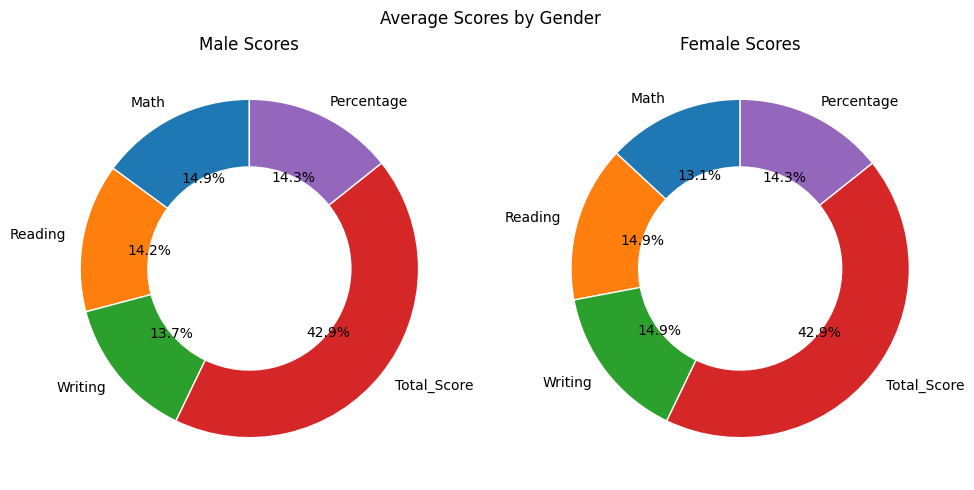

In [62]:

male_data = df[df['gender'] == 'male']
female_data = df[df['gender'] == 'female']

male_scores = male_data[['math score', 'reading score', 'writing score','Total Score','Percentage']].mean()
female_scores = female_data[['math score', 'reading score', 'writing score','Total Score','Percentage']].mean()

test_prep_labels = ['None', 'Completed']

test_prep_counts = [
    len(male_data[male_data['test preparation course'] == 'none']),
    len(male_data[male_data['test preparation course'] == 'completed']),
]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(male_scores, labels=['Math', 'Reading', 'Writing','Total_Score','Percentage'], autopct='%1.1f%%', startangle=90,
           wedgeprops=dict(width=0.4, edgecolor='w'))
axs[0].set_title('Male Scores')

axs[1].pie(female_scores, labels=['Math', 'Reading', 'Writing','Total_Score','Percentage'], autopct='%1.1f%%', startangle=90,
           wedgeprops=dict(width=0.4, edgecolor='w'))
axs[1].set_title('Female Scores')

plt.suptitle('Average Scores by Gender')

plt.tight_layout()
plt.show()



**5 Convert Entire data into JSON (Dict)**

In [88]:
json_data = df.to_dict(orient="records")
json_data

[{'gender': 'female',
  'race/ethnicity': 'group B',
  'parental level of education': "bachelor's degree",
  'lunch': 'standard',
  'test preparation course': 'none',
  'math score': 72,
  'reading score': 72,
  'writing score': 74,
  'Total Score': 218,
  'Percentage': 72.66666666666667,
  'Grade': 'C',
  'name': 'Mia'},
 {'gender': 'female',
  'race/ethnicity': 'group C',
  'parental level of education': 'some college',
  'lunch': 'standard',
  'test preparation course': 'completed',
  'math score': 69,
  'reading score': 90,
  'writing score': 88,
  'Total Score': 247,
  'Percentage': 82.33333333333334,
  'Grade': 'B',
  'name': 'Lindsey'},
 {'gender': 'female',
  'race/ethnicity': 'group B',
  'parental level of education': "master's degree",
  'lunch': 'standard',
  'test preparation course': 'none',
  'math score': 90,
  'reading score': 95,
  'writing score': 93,
  'Total Score': 278,
  'Percentage': 92.66666666666666,
  'Grade': 'A',
  'name': 'Shannon'},
 {'gender': 'male',
  